In [24]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [28]:
'''
transforms.ToTensor() — converts the image into numbers, that are understandable by the system.
transforms.Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.
'''
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ),(0.5, )),])


In [29]:

trainset = datasets.MNIST('./datasets/train', download=True, train=True, transform=transform)

valset = datasets.MNIST('./datasets/val', download=True, train=False, transform=transform)


In [30]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


In [33]:
dataiter = iter(trainloader)
images, labels = dataiter.__next__()
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

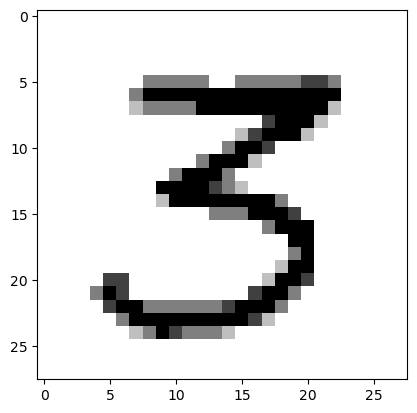

In [34]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


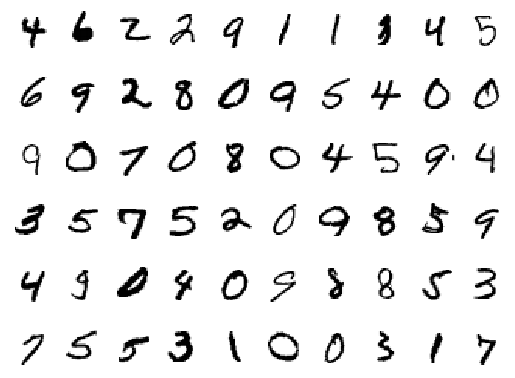

In [35]:
figure = plt.figure()
num_of_images = 60

for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Build the neural network

In [36]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [37]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0048, -0.0048, -0.0048,  ..., -0.0048, -0.0048, -0.0048],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        ...,
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010]])


In [38]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6309942880641423
Epoch 1 - Training loss: 0.28121978097728323
Epoch 2 - Training loss: 0.22207318895708905
Epoch 3 - Training loss: 0.1784873705015762
Epoch 4 - Training loss: 0.14735940455405444
Epoch 5 - Training loss: 0.12745531278847058
Epoch 6 - Training loss: 0.11238041275770648
Epoch 7 - Training loss: 0.10067401882777335
Epoch 8 - Training loss: 0.0901827216937717
Epoch 9 - Training loss: 0.08222017525933556
Epoch 10 - Training loss: 0.0740196581638015
Epoch 11 - Training loss: 0.06904959295099891
Epoch 12 - Training loss: 0.06237945630044333
Epoch 13 - Training loss: 0.057638127984020356
Epoch 14 - Training loss: 0.053407793658088516

Training Time (in minutes) = 1.929293429851532


In [39]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

SyntaxError: invalid syntax (568070358.py, line 3)